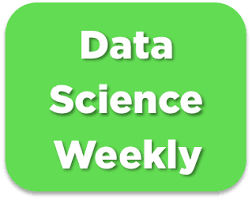

# Challenge : predict conversions 🏆🏆

This is the template that shows the different steps of the challenge. In this notebook, all the training/predictions steps are implemented for a very basic model (logistic regression with only one variable). Please use this template and feel free to change the preprocessing/training steps to get the model with the best f1-score ! May the force be with you 🧨🧨  

**For a detailed description of this project, please refer to *02-Conversion_rate_challenge.ipynb*.**

# Import libraries

In [38]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg" # to be replaced by "iframe" if working on JULIE
from IPython.display import display

# Read file with labels

In [39]:
data = pd.read_csv('https://julie-2-next-resources.s3.eu-west-3.amazonaws.com/full-stack-part-time/projects-supervised-machine-learning-pt/walmart-sales-pt/conversion_data_train.csv')
print('Set with labels (our train+test) :', data.shape)

Set with labels (our train+test) : (284580, 6)


In [40]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


In [41]:
data.columns

Index(['country', 'age', 'new_user', 'source', 'total_pages_visited',
       'converted'],
      dtype='object')

# Explore dataset

In [42]:
# Le jeu de données est assez volumineux : vous devez créer un échantillon du jeu de données avant d'effectuer des visualisations !
data = data.sample(10000)

In [43]:
# les statistiques de base
print("Number of rows : {}".format(data.shape[0]))
print()

print("Display of dataset: ")
display(data.head())
print()

print("Basics statistics: ")
data_desc = data.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*data.isna().sum()/data.shape[0])

Number of rows : 10000

Display of dataset: 


,country,age,new_user,source,total_pages_visited,converted
76030,US,38,1,Seo,7,0
138396,US,38,1,Seo,19,1
283800,US,30,1,Direct,1,0
39748,China,35,1,Ads,5,0
65373,US,21,1,Seo,9,0



Basics statistics: 


,country,age,new_user,source,total_pages_visited,converted
count,10000,10000.000000,10000.000000,10000,10000.000000,10000.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,5612,NaN,NaN,4956,NaN,NaN
mean,NaN,30.688400,0.689200,NaN,4.874700,0.033600
std,NaN,8.295817,0.462844,NaN,3.317484,0.180206
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000



Percentage of missing values: 


country                0.0
age                    0.0
new_user               0.0
source                 0.0
total_pages_visited    0.0
converted              0.0
dtype: float64

In [44]:
# Structure des données
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 76030 to 263185
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   country              10000 non-null  object
 1   age                  10000 non-null  int64 
 2   new_user             10000 non-null  int64 
 3   source               10000 non-null  object
 4   total_pages_visited  10000 non-null  int64 
 5   converted            10000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 546.9+ KB


None

<ipython-input-45-cb85b0ffb320>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<ipython-input-45-cb85b0ffb320>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-45-cb85b0ffb320>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<ipython-input-45-cb85b0ffb320>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




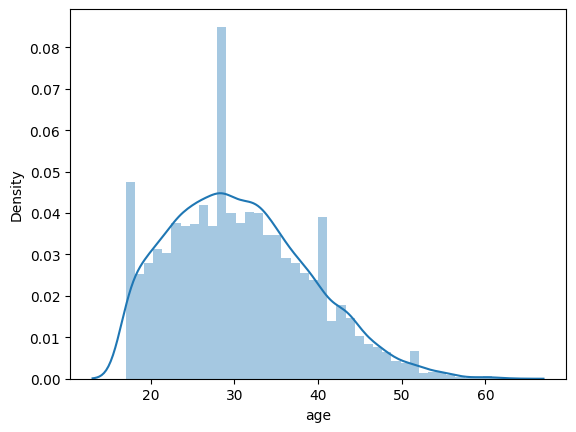

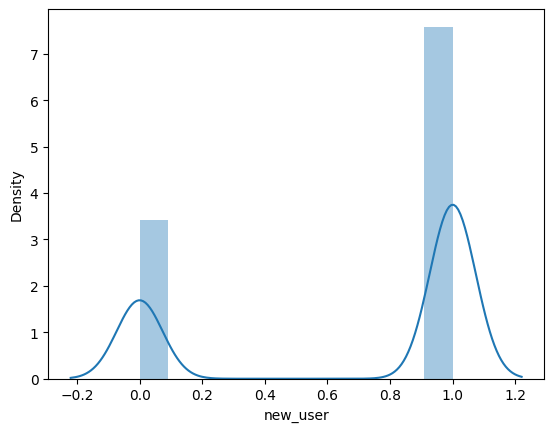

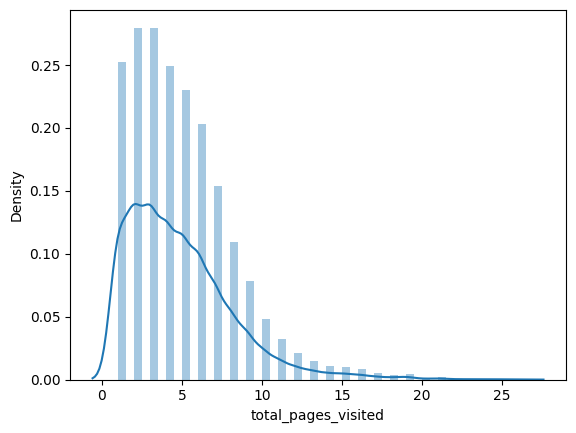

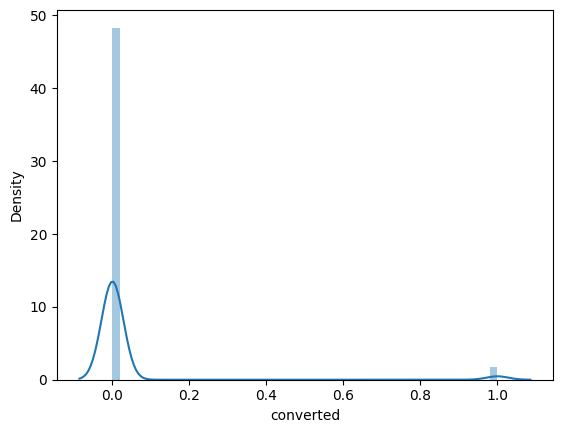

In [45]:
# Nous pouvons visualiser d’un seul coup la distribution de chaque variable
import seaborn as sns
for col in data.select_dtypes('int64'):
    plt.figure()
    sns.distplot(data[col])
    print()

In [46]:
# Affichage du nombre total d'utilisateurs dans le jeu de données
num_users = len(data)
print("Nombre total d'utilisateurs : ", num_users)

Nombre total d'utilisateurs :  10000


In [47]:
# Affichage du nombre de conversions dans le jeu de données
num_converted = len(data[data['converted'] == 1])
print("Nombre total de conversions : ", num_converted)

Nombre total de conversions :  336


In [48]:
# Calcul du taux de conversion
conversion_rate = num_converted / num_users
print("Taux de conversion : {:.2%}".format(conversion_rate))

Taux de conversion : 3.36%


In [49]:
# Affichage de la distribution de l'âge
print(data['age'].describe())

count    10000.000000
mean        30.688400
std          8.295817
min         17.000000
25%         24.000000
50%         30.000000
75%         36.000000
max         63.000000
Name: age, dtype: float64


In [50]:
# Affichage du nombre moyen de pages visitées par les utilisateurs convertis et non convertis
print(data.groupby('converted')['total_pages_visited'].mean())

converted
0     4.546254
1    14.321429
Name: total_pages_visited, dtype: float64


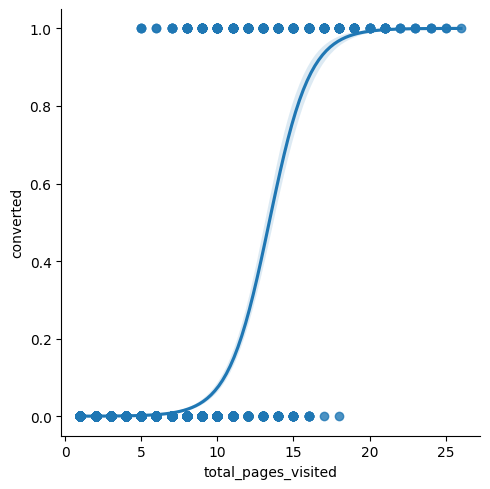

In [51]:
# Visualization of a linear relationship
sns.lmplot(x="total_pages_visited", y="converted", data= data, logistic = True)

In [53]:
# Charger les données de test

test_data = pd.read_csv("https://julie-resources.s3.eu-west-3.amazonaws.com/full-stack-part-time/projects-supervised-machine-learning-pt/walmart-sales-pt/conversion_data_train.csv")
print('Set with labels (our test) :', test_data.shape)

Set with labels (our test) : (284580, 6)


In [54]:
# The dataset of test is quite big : you must create a sample of the dataset before making any visualizations !
test_data = test_data.sample(10000)

In [56]:
print("Number of rows : {}".format(test_data.shape[0]))
print()

Number of rows : 10000



# Make your model

## Choose variables to use in the model, and create train and test sets
**From the EDA, we know that the most useful feature is total_pages_visited. Let's create a baseline model by using at first only this feature : in the next cells, we'll make preprocessings and train a multivariate logistic regression.**

In [58]:
X_train = data.drop('converted', axis=1)
y_train = data['converted']
X_test = test_data.drop('converted', axis=1)
y_test = test_data['converted']

In [59]:
# Transformer les données catégorielles
data = pd.get_dummies(data, columns=['new_user'])

In [60]:
features_list = ['age', 'total_pages_visited']
numeric_indices = [0]
categorical_indices = []
target_variable = 'converted'

In [66]:
X = data.loc[:, features_list]
y = data.loc[:, target_variable]

print('Explanatory variables : ', X.columns)
print()

Explanatory variables :  Index(['age', 'total_pages_visited'], dtype='object')



In [67]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [68]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = y_train.values
Y_test = y_test.values
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(Y_train[0:5])
print(Y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[[20  6]
 [25  5]
 [18  4]
 [29  4]
 [34  5]]
[[27  5]
 [33  1]]

[0 0 0 0 0]
[0 0]


## Training pipeline

In [69]:
# Put here all the preprocessings
print("Encoding categorical features and standardizing numerical features...")

featureencoder = StandardScaler()
X_train = featureencoder.fit_transform(X_train)
print("...Done")
print(X_train[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[-1.28797433  0.34560827]
 [-0.68614217  0.04217695]
 [-1.5287072  -0.26125436]
 [-0.20467643 -0.26125436]
 [ 0.39715573  0.04217695]]


In [70]:
# Train model
print("Train model...")
classifier = LogisticRegression() # 
classifier.fit(X_train, y_train)
print("...Done.")

Train model...
...Done.


In [72]:
# Predictions on training set
print("Predictions on training set...")
y_train_pred = classifier.predict(X_train)
print("...Done.")
print(y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



## Test pipeline

In [73]:
# Use X_test, and the same preprocessings as in training pipeline, 
# but call "transform()" instead of "fit_transform" methods (see example below)

print("Encoding categorical features and standardizing numerical features...")

X_test = featureencoder.transform(X_test)
print("...Done")
print(X_test[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[-0.4454093   0.04217695]
 [ 0.2767893  -1.17154832]
 [ 0.03605643  1.86276486]
 [-0.92687503  0.34560827]
 [ 0.39715573 -0.56468568]]


In [75]:
# Predictions on test set
print("Predictions on test set...")
y_test_pred = classifier.predict(X_test)
print("...Done.")
print(y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0

## Performance assessment

In [76]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, y_test_pred))

f1-score on train set :  0.6949494949494949
f1-score on test set :  0.7407407407407406


Notre modèle de référence atteint un score f1 de 74 %. On peut affiner notre modèle et essayer de battre ce score.

In [77]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, y_test_pred))
print()

Confusion matrix on train set : 
[[8677   35]
 [ 116  172]]

Confusion matrix on test set : 
[[949   3]
 [ 18  30]]



In [80]:
# Analyse des paramètres du modèle
print('Paramètres du modèle :', classifier.coef_)

# Recommandations pour améliorer le taux de conversion
print('- Encourager les utilisateurs à visiter davantage de pages pour augmenter leur taux d\'engagement.')
print('- Améliorer l\'expérience utilisateur pour inciter les nouveaux utilisateurs à se convertir plus rapidement.')
print('- Cibler les utilisateurs en fonction de la source pour optimiser les campagnes marketing.')

Paramètres du modèle : [[-0.65770961  2.40475987]]
- Encourager les utilisateurs à visiter davantage de pages pour augmenter leur taux d'engagement.
- Améliorer l'expérience utilisateur pour inciter les nouveaux utilisateurs à se convertir plus rapidement.
- Cibler les utilisateurs en fonction de la source pour optimiser les campagnes marketing.
